<div id="title_div">
    <h1><span>Los Angelos</span> Seaport</h1>
</div>
<div class="content_div">
    <br>
    <div class="list_div">
        <ul>
            <li><a href="#sec1">Import & Clean Data</a></li>
            <li><a href="#sec2">Remove Blank Rows</a></li>
        </ul>    
    </div>
    <div class="list_div">
        <ul>
            <li><a href="#sec3">Reduce Memory Usage</a></li>
            <li><a href="#sec4">Summarize The Data</a></li>
        </ul>
    </div>
    <div class="list_div">
        <ul>
            <li><a href="#sec5">Styling Sheet</a></li>
        </ul>
    </div>
</div>

<div id="sec1" class="heading_div">
    <h2>Import & Data Info</h2>
    <a href="#title_div">^</a>
</div>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('shipping_data.csv')

In [3]:
data.head()

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port
0,Camera Bag,37.66,1.10,0.40,0.39,0.26,2023-03-19,Port of Singapore (Singapore)
1,Portable Bluetooth Keyboard,144.65,0.39,0.11,0.06,0.03,2023-03-21,Port of Busan (South Korea)
2,Large Flat Rate Box,38.57,0.97,0.79,0.55,0.35,2023-03-25,Port of Tianjin (China)
3,Ceramic Tiles,10.34,6.22,0.36,0.37,0.02,2023-03-15,Port of Shanghai (China)
4,Garden Hose,21.63,1.18,17.77,0.27,0.13,2023-03-25,Port of Tianjin (China)


In [4]:
rows , cols = data.shape

print("Rows    : {}\nColumns : {}".format(rows,cols))

Rows    : 263821
Columns : 8


<div id="sec2" class="heading_div">
    <h2>Remove Blank Rows</h2>
    <a href="#title_div">^</a>
</div>

<h6>Describe Data</h6>

In [5]:
data.describe()

,price ($),weight (kg),length (m),width (m),height (m)
count,2.638210e+05,263808.000000,263637.000000,263821.000000,263821.000000
mean,4.194461e+03,324.172967,0.953964,0.530234,0.462629
std,6.250511e+04,1520.872881,1.928742,0.453106,0.512927
min,1.000000e+00,0.050000,0.050000,0.010000,0.010000
25%,2.785000e+01,0.710000,0.290000,0.210000,0.120000
50%,8.761000e+01,2.960000,0.600000,0.390000,0.250000
75%,2.577600e+02,67.292500,1.140000,0.800000,0.660000
max,1.999707e+06,24982.350000,30.000000,6.000000,5.990000


<h6>Null values present in Dataset</h6>

In [6]:
data.isnull().sum()

name                   0
price ($)              0
weight (kg)           13
length (m)           184
width (m)              0
height (m)             0
shipment date       2638
destination port      26
dtype: int64

<h6>Drop Null Rows</h6>

In [7]:
new_data = data.dropna(how="any",axis=0)

In [8]:
new_data.head()

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port
0,Camera Bag,37.66,1.10,0.40,0.39,0.26,2023-03-19,Port of Singapore (Singapore)
1,Portable Bluetooth Keyboard,144.65,0.39,0.11,0.06,0.03,2023-03-21,Port of Busan (South Korea)
2,Large Flat Rate Box,38.57,0.97,0.79,0.55,0.35,2023-03-25,Port of Tianjin (China)
3,Ceramic Tiles,10.34,6.22,0.36,0.37,0.02,2023-03-15,Port of Shanghai (China)
4,Garden Hose,21.63,1.18,17.77,0.27,0.13,2023-03-25,Port of Tianjin (China)


In [9]:
rows1 , cols1 = new_data.shape

print("Rows    : {}\nColumns : {}".format(rows1,cols1))

Rows    : 260961
Columns : 8


<h6>Percentage of Data removed from Original Dataset</h6>

In [10]:
print("Data removed : {}%".format(round((100 - (rows1/rows) * 100),2)))

Data removed : 1.08%


<div id="sec3" class="heading_div">
    <h2>Reduce Memory</h2>
    <a href="#title_div">^</a>
</div>

In [11]:
new_data.describe()

,price ($),weight (kg),length (m),width (m),height (m)
count,2.609610e+05,260961.000000,260961.000000,260961.000000,260961.000000
mean,4.182420e+03,323.909010,0.953425,0.530112,0.462566
std,6.225881e+04,1519.734573,1.924855,0.452834,0.512707
min,1.000000e+00,0.050000,0.050000,0.010000,0.010000
25%,2.785000e+01,0.710000,0.290000,0.210000,0.120000
50%,8.756000e+01,2.960000,0.600000,0.390000,0.250000
75%,2.576700e+02,67.340000,1.140000,0.800000,0.660000
max,1.998160e+06,24982.350000,30.000000,6.000000,5.990000


In [12]:
new_data.dtypes

name                 object
price ($)           float64
weight (kg)         float64
length (m)          float64
width (m)           float64
height (m)          float64
shipment date        object
destination port     object
dtype: object

In [13]:
print(new_data.memory_usage(deep=True))

original_size = new_data.memory_usage(deep=True).sum() * 0.000001

print("\nTotal Size: ",original_size," mb")

Index                2087688
name                18312992
price ($)            2087688
weight (kg)          2087688
length (m)           2087688
width (m)            2087688
height (m)           2087688
shipment date       17484387
destination port    21345492
dtype: int64

Total Size:  69.668999  mb


In [14]:
print(np.finfo(np.float64),"\n",np.finfo(np.float32),"\n",np.finfo(np.float16))

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
smallest_normal = 2.2250738585072014e-308   smallest_subnormal = 4.9406564584124654e-324
---------------------------------------------------------------
 
 Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
smallest_normal = 1.1754944e-38   smallest_subnormal = 1.4012985e-45
----------------

In [15]:
new_data.columns

Index(['name', 'price ($)', 'weight (kg)', 'length (m)', 'width (m)',
       'height (m)', 'shipment date', 'destination port'],
      dtype='object')

In [16]:
schema = {
    'name':'category',
    'price ($)': np.float32,
    'weight (kg)': np.float32,
    'length (m)': np.float16,
    'width (m)' : np.float16,
    'height (m)': np.float16,
    'shipment date':'category',
    'destination port':'category',
}

In [17]:
new_data = new_data.astype(schema)
new_data.head(5)

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port
0,Camera Bag,37.660000,1.10,0.399902,0.389893,0.260010,2023-03-19,Port of Singapore (Singapore)
1,Portable Bluetooth Keyboard,144.649994,0.39,0.109985,0.059998,0.029999,2023-03-21,Port of Busan (South Korea)
2,Large Flat Rate Box,38.570000,0.97,0.790039,0.549805,0.350098,2023-03-25,Port of Tianjin (China)
3,Ceramic Tiles,10.340000,6.22,0.360107,0.370117,0.020004,2023-03-15,Port of Shanghai (China)
4,Garden Hose,21.629999,1.18,17.765625,0.270020,0.130005,2023-03-25,Port of Tianjin (China)


In [18]:
new_data.describe()

,price ($),weight (kg),length (m),width (m),height (m)
count,2.609610e+05,260961.000000,260961.000000,260961.000000,260961.000000
mean,4.182420e+03,323.909027,NaN,NaN,NaN
std,6.225881e+04,1519.734619,0.000000,0.000000,0.000000
min,1.000000e+00,0.050000,0.049988,0.010002,0.010002
25%,2.785000e+01,0.710000,0.290039,0.209961,0.119995
50%,8.756000e+01,2.960000,0.600098,0.389893,0.250000
75%,2.576700e+02,67.339996,1.139648,0.799805,0.660156
max,1.998160e+06,24982.349609,30.000000,6.000000,5.988281


In [19]:
print(new_data.memory_usage(deep=True))

new_size = new_data.memory_usage(deep=True).sum() * 0.000001

print("\nTotal Size: ",original_size," mb","\nNew Size: ",new_size," mb","\nReduced by: ",original_size-new_size," mb")

Index               2087688
name                 550723
price ($)           1043844
weight (kg)         1043844
length (m)           521922
width (m)            521922
height (m)           521922
shipment date        262656
destination port     261542
dtype: int64

Total Size:  69.668999  mb 
New Size:  6.816063  mb 
Reduced by:  62.852936  mb


<div id="sec4" class="heading_div">
    <h2>Summarize Data</h2>
    <a href="#title_div">^</a>
</div>

<h6>Exports from Los Angelos Port to Different Ports</h6>

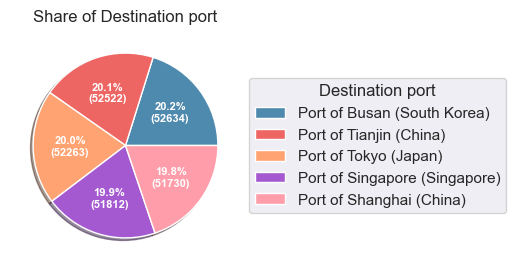

In [20]:
new_df = new_data['destination port'].value_counts().reset_index()

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

mycolors = ['#4E89AE','#ED6663','#FFA372','#A459D1','#FF9EAA','#C1ECE4','#ECE5C7','#CDC2AE']

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

wedges, texts, autotexts = ax.pie(new_df['count'],
                                  autopct=lambda pct: func(pct, new_df['count']),
                                  textprops=dict(color="w"),
                                  shadow = True,
                                  colors = mycolors)

ax.legend(wedges, new_df['destination port'],
          title="Destination port",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Share of Destination port")

plt.show()

<h6>Adding Port Abbreviation for each Destination Port for ease</h6>

In [21]:
def destination_code(port):
    if port == 'Port of Busan (South Korea)':
        return 'KRPUS'
    elif port == 'Port of Tianjin (China)':
        return "CNTXG"
    elif port == 'Port of Tokyo (Japan)':
        return "JPTYO"
    elif port == 'Port of Singapore (Singapore)':
        return 'SGSIN'
    else:
        return 'CN SGH'
    
new_data['Port Code'] = data.apply(lambda x : destination_code(x['destination port']), axis=1)

new_data

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port,Port Code
0,Camera Bag,37.660000,1.100000,0.399902,0.389893,0.260010,2023-03-19,Port of Singapore (Singapore),SGSIN
1,Portable Bluetooth Keyboard,144.649994,0.390000,0.109985,0.059998,0.029999,2023-03-21,Port of Busan (South Korea),KRPUS
2,Large Flat Rate Box,38.570000,0.970000,0.790039,0.549805,0.350098,2023-03-25,Port of Tianjin (China),CNTXG
3,Ceramic Tiles,10.340000,6.220000,0.360107,0.370117,0.020004,2023-03-15,Port of Shanghai (China),CN SGH
4,Garden Hose,21.629999,1.180000,17.765625,0.270020,0.130005,2023-03-25,Port of Tianjin (China),CNTXG
...,...,...,...,...,...,...,...,...,...
263816,Canister,23.580000,3.800000,0.379883,0.370117,0.280029,2023-03-13,Port of Busan (South Korea),KRPUS
263817,Plant,15.980000,1.200000,0.419922,0.290039,0.340088,2023-03-15,Port of Tokyo (Japan),JPTYO
263818,Pallete of Dog Food,223.050003,477.579987,1.000000,0.919922,1.480469,2023-03-19,Port of Tokyo (Japan),JPTYO
263819,Coffee Maker,169.089996,2.520000,0.260010,0.199951,0.290039,2023-03-20,Port of Shanghai (China),CN SGH


<h6>Top 15 Products in each Port</h6>

In [22]:
t = new_data.loc[:,['name','Port Code']].value_counts().reset_index().sort_values(by=["count","name"],ascending=False)

new_df1 = pd.pivot_table(t, values='count', index=['name'],columns=['Port Code'], aggfunc="sum").reset_index()

new_df1['Total'] = new_df1['CN SGH'] + new_df1['CNTXG'] + new_df1['JPTYO'] + new_df1['KRPUS'] + new_df1['SGSIN']

new_df1 = new_df1.sort_values(by="Total",ascending=False)

df1 = new_df1.head(15).reset_index().drop(['index'],axis=1)

df1

Port Code,name,CN SGH,CNTXG,JPTYO,KRPUS,SGSIN,Total
0,Hiking Boots,581,591,617,587,568,2944
1,Medium Box,543,595,563,559,570,2830
2,Large Box,549,548,552,599,581,2829
3,Coffee Maker,416,476,428,466,450,2236
4,Small Box,456,422,456,446,441,2221
5,Pallete of Coffee,448,452,435,440,444,2219
6,Headphones,439,476,445,430,422,2212
7,Portable Charger,429,439,467,447,428,2210
8,Microwave,427,409,437,453,436,2162
9,Bed,416,423,449,427,447,2162


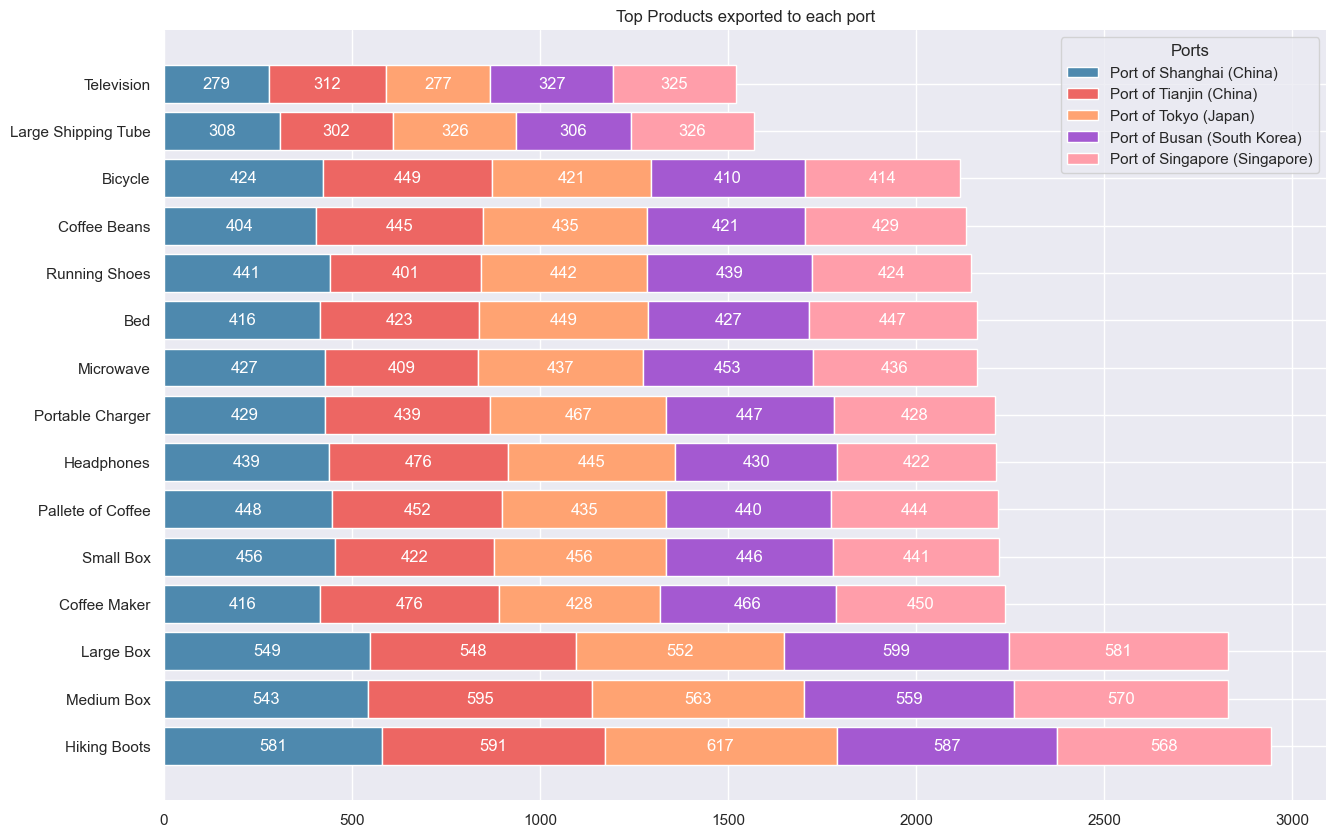

In [23]:
fig, ax = plt.subplots(figsize = (15, 10))

mycolors = ['#4E89AE','#ED6663','#FFA372','#A459D1','#FF9EAA','#C1ECE4','#ECE5C7','#CDC2AE']

a1 = ax.barh(df1['name'],df1['CN SGH'],color=mycolors[0])
ax.bar_label(a1, labels=df1['CN SGH'],label_type='center',color='white')

a2 = ax.barh(df1['name'],df1['CNTXG'],left=df1['CN SGH'],color=mycolors[1])
ax.bar_label(a2, labels=df1['CNTXG'],label_type='center',color='white')

a3 = ax.barh(df1['name'],df1['JPTYO'],left=df1['CN SGH']+df1['CNTXG'],color=mycolors[2])
ax.bar_label(a3, labels=df1['JPTYO'],label_type='center',color='white')

a4 = ax.barh(df1['name'],df1['KRPUS'],left=df1['CN SGH']+df1['CNTXG']+df1['JPTYO'],color=mycolors[3])
ax.bar_label(a4, labels=df1['KRPUS'],label_type='center',color='white')

a5 = ax.barh(df1['name'],df1['SGSIN'],left=df1['CN SGH']+df1['CNTXG']+df1['JPTYO']+df1['KRPUS'],color=mycolors[4])
ax.bar_label(a5, labels=df1['SGSIN'],label_type='center',color='white')

plt.legend([a1,a2,a3,a4,a5], ["Port of Shanghai (China)","Port of Tianjin (China)",'Port of Tokyo (Japan)','Port of Busan (South Korea)','Port of Singapore (Singapore)'], title="Ports", loc="upper right")

ax.set_title('Top Products exported to each port')

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

<h6>Adding Volume Column (l x b x h)</h6>

In [24]:
new_data['Volume (m^3)'] = new_data['length (m)'] * new_data['width (m)'] * new_data['height (m)']

new_data

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port,Port Code,Volume (m^3)
0,Camera Bag,37.660000,1.100000,0.399902,0.389893,0.260010,2023-03-19,Port of Singapore (Singapore),SGSIN,0.040527
1,Portable Bluetooth Keyboard,144.649994,0.390000,0.109985,0.059998,0.029999,2023-03-21,Port of Busan (South Korea),KRPUS,0.000198
2,Large Flat Rate Box,38.570000,0.970000,0.790039,0.549805,0.350098,2023-03-25,Port of Tianjin (China),CNTXG,0.152100
3,Ceramic Tiles,10.340000,6.220000,0.360107,0.370117,0.020004,2023-03-15,Port of Shanghai (China),CN SGH,0.002666
4,Garden Hose,21.629999,1.180000,17.765625,0.270020,0.130005,2023-03-25,Port of Tianjin (China),CNTXG,0.623535
...,...,...,...,...,...,...,...,...,...,...
263816,Canister,23.580000,3.800000,0.379883,0.370117,0.280029,2023-03-13,Port of Busan (South Korea),KRPUS,0.039368
263817,Plant,15.980000,1.200000,0.419922,0.290039,0.340088,2023-03-15,Port of Tokyo (Japan),JPTYO,0.041412
263818,Pallete of Dog Food,223.050003,477.579987,1.000000,0.919922,1.480469,2023-03-19,Port of Tokyo (Japan),JPTYO,1.362305
263819,Coffee Maker,169.089996,2.520000,0.260010,0.199951,0.290039,2023-03-20,Port of Shanghai (China),CN SGH,0.015083


<h6>Standard Container Dimensions</h6>

In [25]:
container_type = ['20FT General','20FT High Cube','40FT General','40FT High Cube']
length = [5.89,5.89,12.05,12.05]
width = [2.35,2.35,2.35,2.35]
height = [2.36,2.69,2.36,2.69]
volume = [33,37,66,76]
cargo_weight = [21700,21700,30480,30480]

container_tb = pd.DataFrame({'Container Type':container_type,'length (m)':length,'width (m)':width,
                             'height (m)':height,'volume (m^3)':volume,'Cargo Weight (kg)':cargo_weight})

container_tb

,Container Type,length (m),width (m),height (m),volume (m^3),Cargo Weight (kg)
0,20FT General,5.89,2.35,2.36,33,21700
1,20FT High Cube,5.89,2.35,2.69,37,21700
2,40FT General,12.05,2.35,2.36,66,30480
3,40FT High Cube,12.05,2.35,2.69,76,30480


<h6>Each Port with Count & Weight for each Standard Containers </h6>

In [26]:
vol_tb = new_data[['Port Code','Volume (m^3)','weight (kg)']]

vol_tb = vol_tb.groupby(by='Port Code').sum().reset_index()

for container in container_tb['Container Type'].values:
    val = vol_tb['Volume (m^3)'] / container_tb[container_tb['Container Type'] == container]['volume (m^3)'].values[0]
    vol_tb['Full packed '+container] = val.astype(float).round(1)
    val1 = vol_tb['weight (kg)'] / val
    vol_tb['Full packed '+container+' (kg)'] = val1.astype(float).round(2)
    
vol_tb

,Port Code,Volume (m^3),weight (kg),Full packed 20FT General,Full packed 20FT General (kg),Full packed 20FT High Cube,Full packed 20FT High Cube (kg),Full packed 40FT General,Full packed 40FT General (kg),Full packed 40FT High Cube,Full packed 40FT High Cube (kg)
0,CN SGH,77645.976562,17013256.0,2352.9,7230.73,2098.5,8107.19,1176.5,14461.47,1021.7,16652.60
1,CNTXG,90071.140625,17686996.0,2729.4,6480.11,2434.4,7265.58,1364.7,12960.22,1185.1,14923.89
2,JPTYO,84591.257812,16666645.0,2563.4,6501.85,2286.3,7289.95,1281.7,13003.69,1113.0,14973.95
3,KRPUS,77935.195312,16463202.0,2361.7,6970.99,2106.4,7815.96,1180.8,13941.99,1025.5,16054.41
4,SGSIN,79761.554688,16697519.0,2417.0,6908.32,2155.7,7745.69,1208.5,13816.63,1049.5,15910.06


<h6>Count of goods in different Shipping Dates by different Ports</h6>

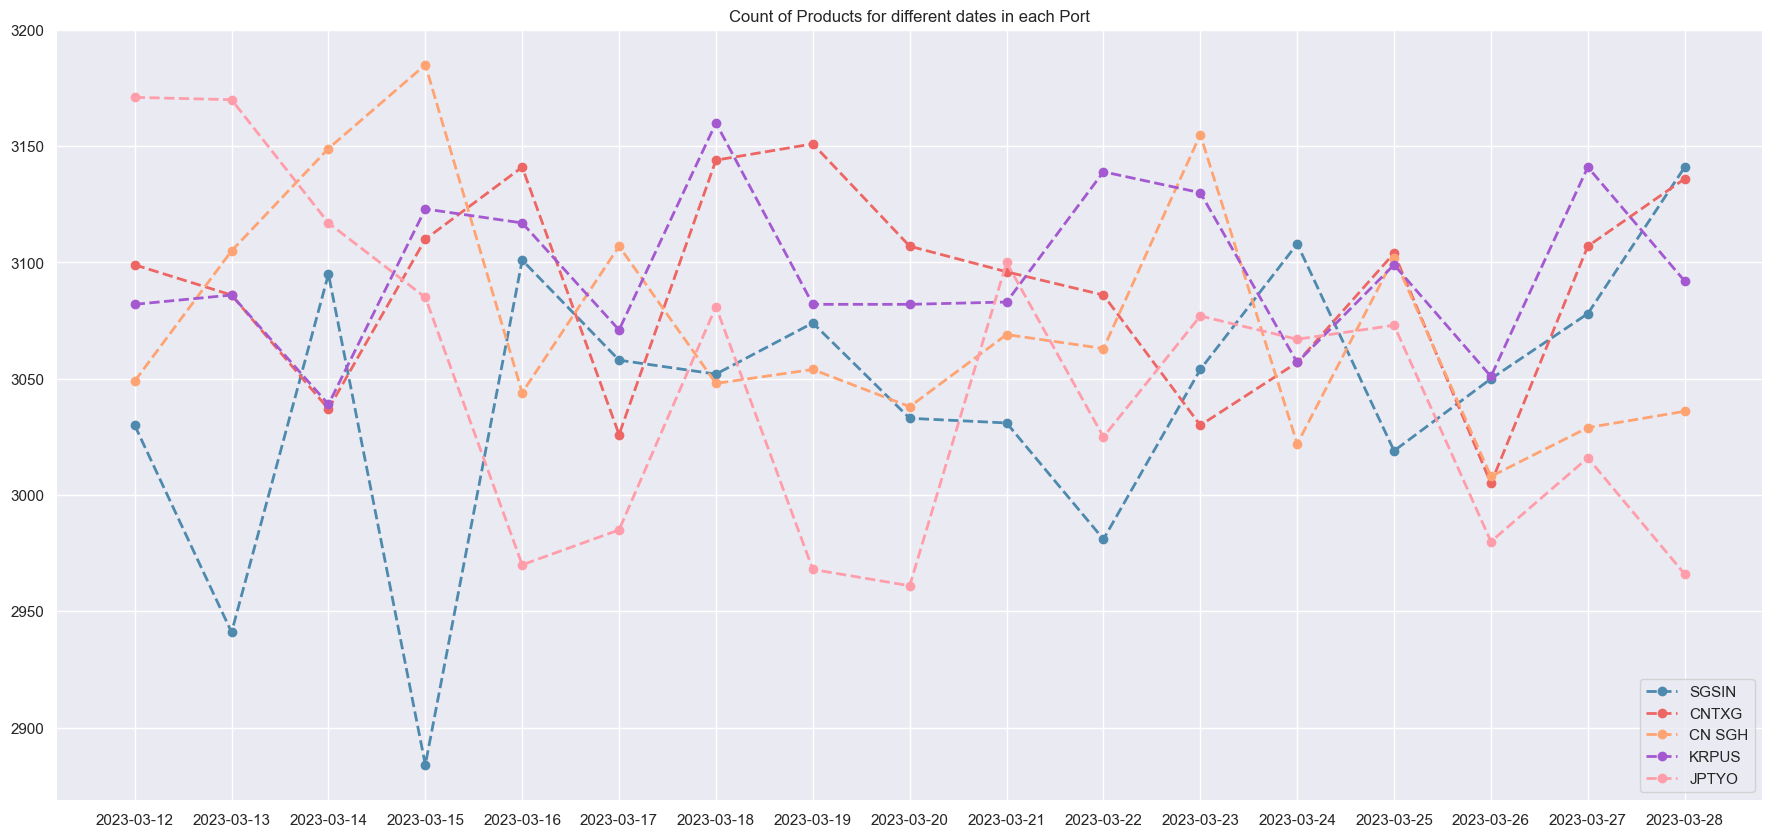

In [27]:
time_data = new_data[['Port Code','shipment date']].value_counts().reset_index().sort_values(by="shipment date")

mycolors = ['#4E89AE','#ED6663','#FFA372','#A459D1','#FF9EAA','#C1ECE4','#ECE5C7','#CDC2AE']

fig, ax = plt.subplots(figsize = (22, 10))

i=0
for p_code in np.sort(time_data['Port Code'].unique()):
    ax.plot(time_data[time_data['Port Code'] == p_code]['shipment date'], 
            time_data[time_data['Port Code'] == p_code]['count'], 
            color=mycolors[i], linewidth=2, linestyle='dashed', marker='o')
    i+=1

ax.legend(time_data['Port Code'].unique(), loc ="lower right")
ax.set_title('Count of Products for different dates in each Port')

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

<h6>Volume exported for different dates in each Ports</h6>

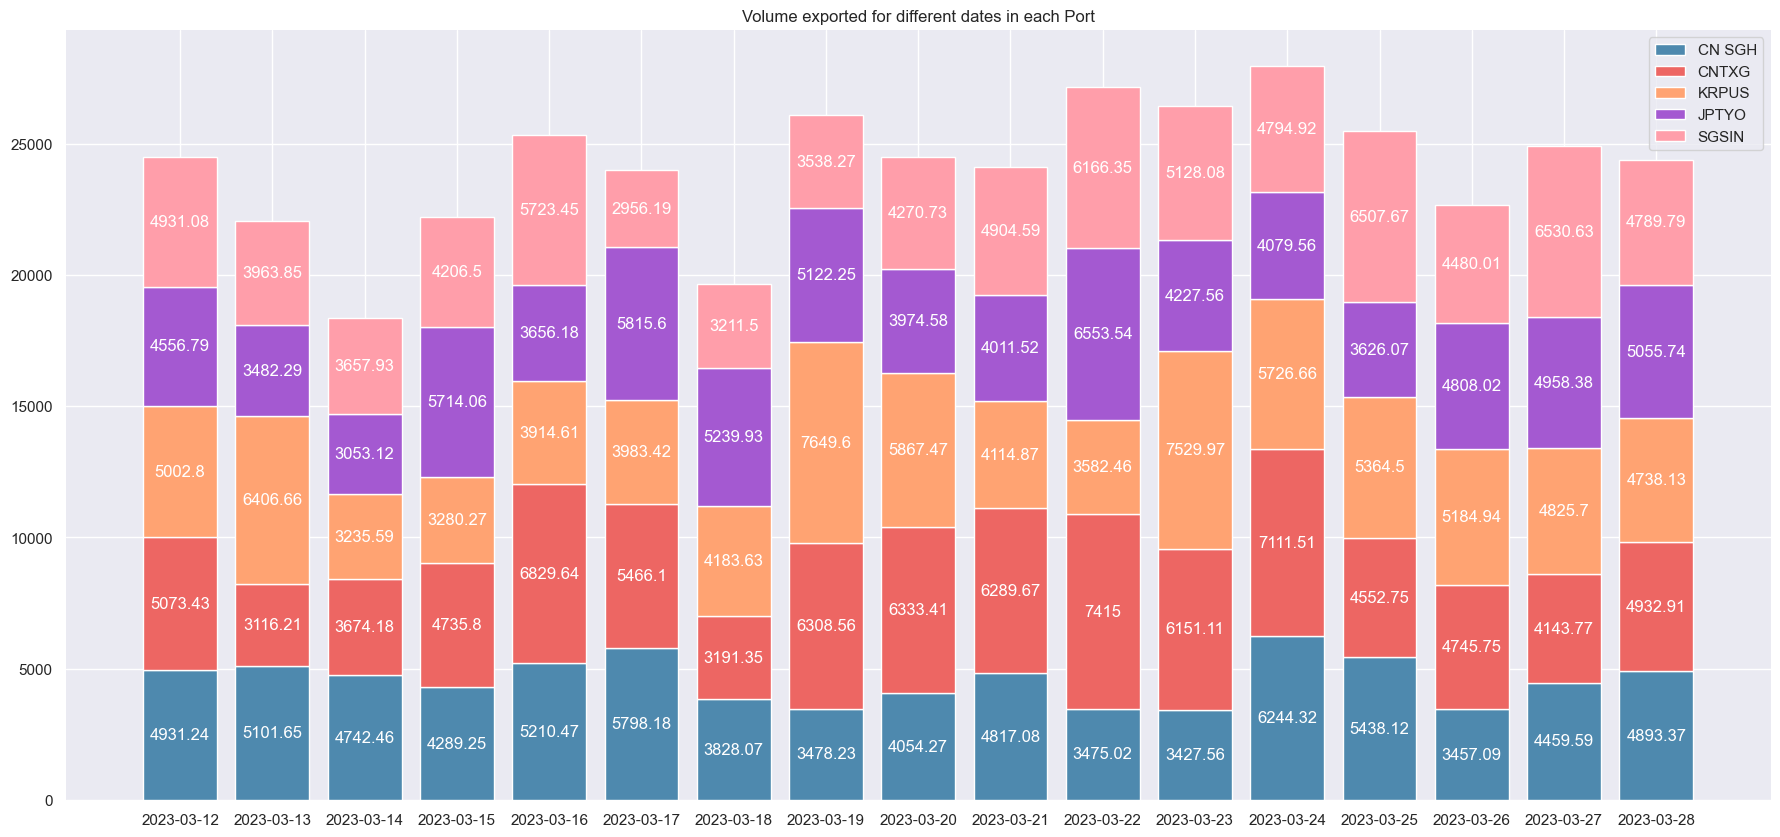

In [28]:
time_vol_data = new_data.groupby(['Port Code','shipment date',]).agg({'Volume (m^3)':'sum','weight (kg)':'sum'}).reset_index().sort_values(by="shipment date")

mycolors = ['#4E89AE','#ED6663','#FFA372','#A459D1','#FF9EAA','#C1ECE4','#ECE5C7','#CDC2AE']

fig, ax = plt.subplots(figsize = (22, 10))
item2 = time_vol_data.loc[:,'shipment date'].unique()
bottom2 = np.zeros(item2.shape[0],dtype=int)

i=0
for i, p_code in enumerate(np.sort(time_vol_data['Port Code'].unique())):
    p = ax.bar(time_vol_data[time_vol_data['Port Code'] == p_code]['shipment date'], 
               time_vol_data[time_vol_data['Port Code'] == p_code]['Volume (m^3)'],
               bottom=bottom2,color=mycolors[i])
    arr2 = time_vol_data[time_vol_data['Port Code'] == p_code]['Volume (m^3)'].to_numpy()
    bottom2 = np.add(bottom2,arr2)
    ax.bar_label( p, label_type='center',color='white')

ax.legend(time_vol_data['Port Code'].unique(), loc ="upper right")
ax.set_title('Volume exported for different dates in each Port')

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
plt.show()

<h6>How much Different Standard Containers would be sent each day to different ports?</h6>

In [29]:
time_vol_data

for container in container_tb['Container Type'].values:
    val = time_vol_data['Volume (m^3)'] / container_tb[container_tb['Container Type'] == container]['volume (m^3)'].values[0]
    time_vol_data['Full packed '+container] = val.astype(float).round(1)
    val1 = time_vol_data['weight (kg)'] / val
    time_vol_data['Full packed '+container+' (kg)'] = val1.astype(float).round(2)
    
time_vol_data

,Port Code,shipment date,Volume (m^3),weight (kg),Full packed 20FT General,Full packed 20FT General (kg),Full packed 20FT High Cube,Full packed 20FT High Cube (kg),Full packed 40FT General,Full packed 40FT General (kg),Full packed 40FT High Cube,Full packed 40FT High Cube (kg)
0,CN SGH,2023-03-12,4931.241699,8.623138e+05,149.4,5770.63,133.3,6470.10,74.7,11541.25,64.9,13289.93
17,CNTXG,2023-03-12,5073.427734,1.082152e+06,153.7,7038.83,137.1,7892.02,76.9,14077.66,66.8,16210.64
51,KRPUS,2023-03-12,4556.792480,8.892797e+05,138.1,6440.11,123.2,7220.73,69.0,12880.21,60.0,14831.76
34,JPTYO,2023-03-12,5002.795898,9.446356e+05,151.6,6231.11,135.2,6986.40,75.8,12462.22,65.8,14350.44
68,SGSIN,2023-03-12,4931.080566,1.123137e+06,149.4,7516.31,133.3,8427.38,74.7,15032.62,64.9,17310.29
...,...,...,...,...,...,...,...,...,...,...,...,...
33,CNTXG,2023-03-28,4932.909180,1.051667e+06,149.5,7035.40,133.3,7888.18,74.7,14070.80,64.9,16202.75
16,CN SGH,2023-03-28,4893.372070,1.004114e+06,148.3,6771.56,132.3,7592.36,74.1,13543.12,64.4,15595.11
67,KRPUS,2023-03-28,5055.738281,1.039763e+06,153.2,6786.78,136.6,7609.42,76.6,13573.56,66.5,15630.16
50,JPTYO,2023-03-28,4738.125977,1.185169e+06,143.6,8254.44,128.1,9254.98,71.8,16508.88,62.3,19010.23


<h6>20 Ft General Container for Different Ports each day</h6>

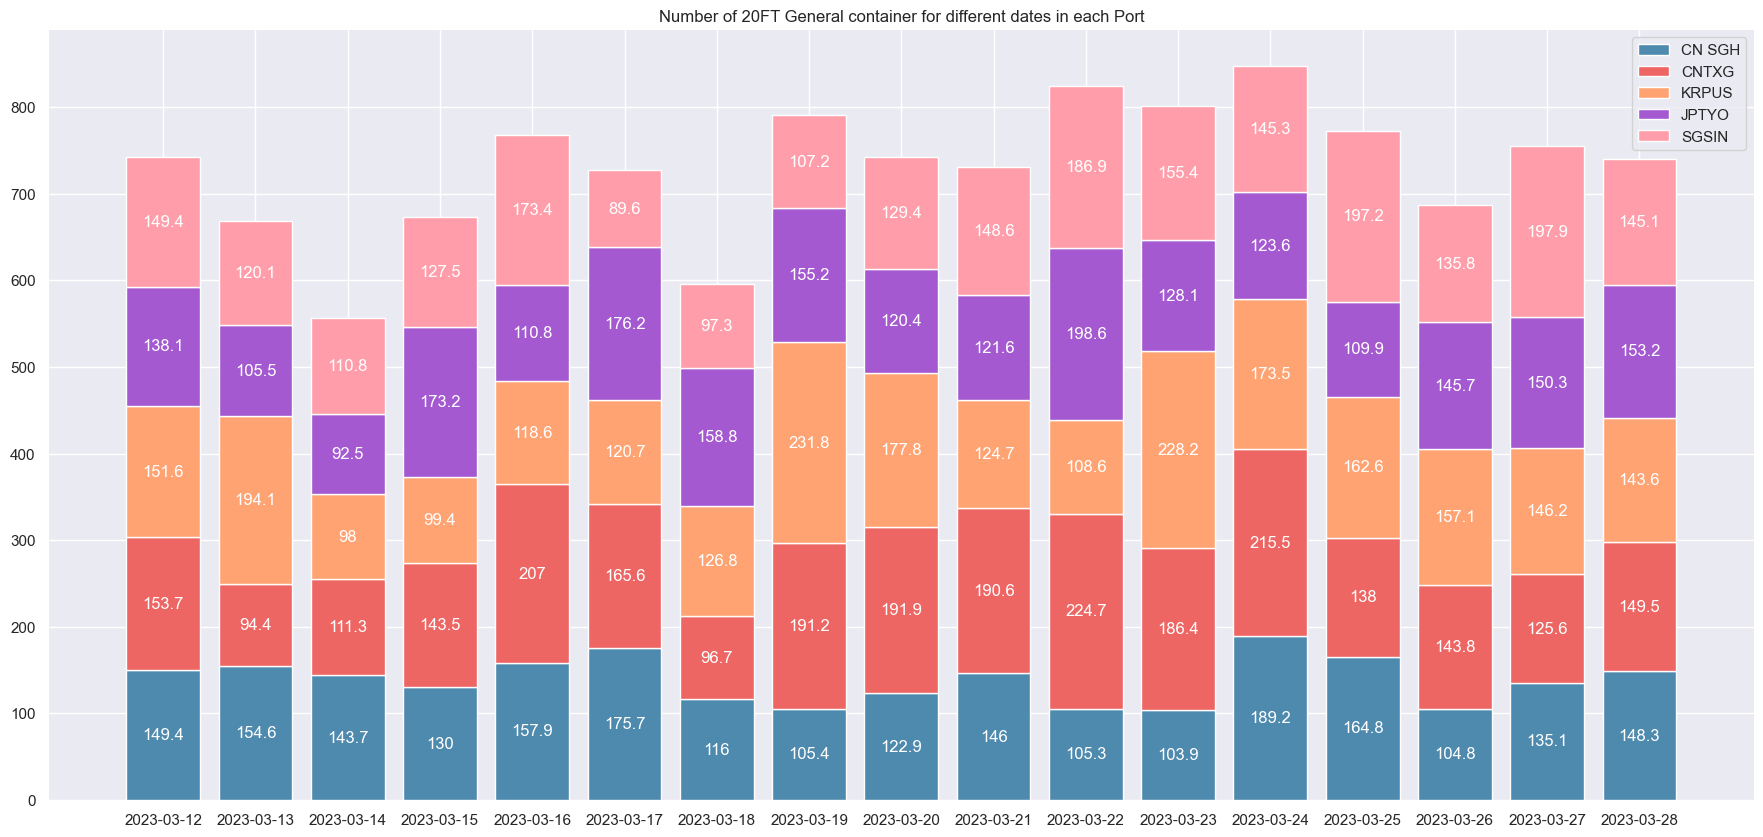

In [30]:
fig, ax = plt.subplots(figsize = (22, 10))
item1 = time_vol_data.loc[:,'shipment date'].unique()
bottom1 = np.zeros(item1.shape[0],dtype=int)

mycolors = ['#4E89AE','#ED6663','#FFA372','#A459D1','#FF9EAA','#C1ECE4','#ECE5C7','#CDC2AE']

for i,p_code in enumerate(np.sort(time_vol_data['Port Code'].unique())):
    p = ax.bar(time_vol_data[time_vol_data['Port Code'] == p_code]['shipment date'], 
           time_vol_data[time_vol_data['Port Code'] == p_code]['Full packed 20FT General'],
           bottom=bottom1,color=mycolors[i])
    arr1 = time_vol_data[time_vol_data['Port Code'] == p_code]['Full packed 20FT General'].to_numpy()
    bottom1 = np.add(bottom1,arr1)
    ax.bar_label( p, label_type='center',color='white')
    
ax.legend(time_vol_data['Port Code'].unique(), loc ="upper right")
ax.set_title('Number of 20FT General container for different dates in each Port')

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
plt.show()

<h6>Scatter Plot Volume VS Price for different products</h6>

In [31]:
def scatter_chart():
    input_val = int(input("Select value from above list to see scatter plot: "))

    for i,d in enumerate(np.sort(new_data['name'].unique())):
        if input_val == i+1:
            select_name = d
            break
    
    fig, ax = plt.subplots(figsize = (22, 10))
    corr_data = new_data[new_data['name'] == select_name]

    mycolors = ['#4E89AE','#ED6663','#FFA372','#A459D1','#FF9EAA','#C1ECE4','#ECE5C7','#CDC2AE']

    for i,p_code in enumerate(np.sort(corr_data['Port Code'].unique())):
        ax.scatter(corr_data[corr_data['Port Code'] == p_code]['Volume (m^3)'],
                   corr_data[corr_data['Port Code'] == p_code]['price ($)'],
                   c=mycolors[i],
                   alpha=0.8)

    ax.legend(corr_data['Port Code'].unique(), loc ="upper right")
    ax.set_title('{} : Volume VS Price'.format(select_name))
    plt.xlabel('Volume')
    plt.ylabel('Price')

    plt.show()

for i,d in enumerate(np.sort(new_data['name'].unique())):
    print('{}.'.format(i+1),d)


1. ATV
2. Air Conditioner
3. Air Conditioners
4. Aluminum Sheets
5. Apples
6. Armchair
7. Assorted Chocolates
8. Assorted Tea Bags
9. Backpack
10. Backpacking Tent
11. Bag of Flour
12. Bag of Rice
13. Bananas
14. Bassinet
15. Bathroom Scale
16. Beach Towel
17. Bed
18. Bicycle
19. Big Bag with Chemicals
20. Big Bag with Coal
21. Big Bag with Debris
22. Big Bag with Fertilizer
23. Big Bag with Food Ingredients
24. Big Bag with Glass Scraps
25. Big Bag with Grains
26. Big Bag with Granules
27. Big Bag with Metal Scraps
28. Big Bag with Paper Scraps
29. Big Bag with Plastic Scraps
30. Big Bag with Rocks
31. Big Bag with Sand
32. Big Bag with Textile Scraps
33. Blender
34. Bluetooth Speaker
35. Bookshelf
36. Bottle of Olive Oil
37. Box of Books
38. Box of Canned Soup
39. Box of Cans of Tuna
40. Box of Chocolate Bar
41. Box of Clothes
42. Box of Crackers
43. Box of Pasta
44. Box of Tea
45. Box of Toys
46. Breakfast Bundle
47. Bricks
48. Briefcase
49. Camera
50. Camera Bag
51. Camping Stove
5

Select value from above list to see scatter plot: 118


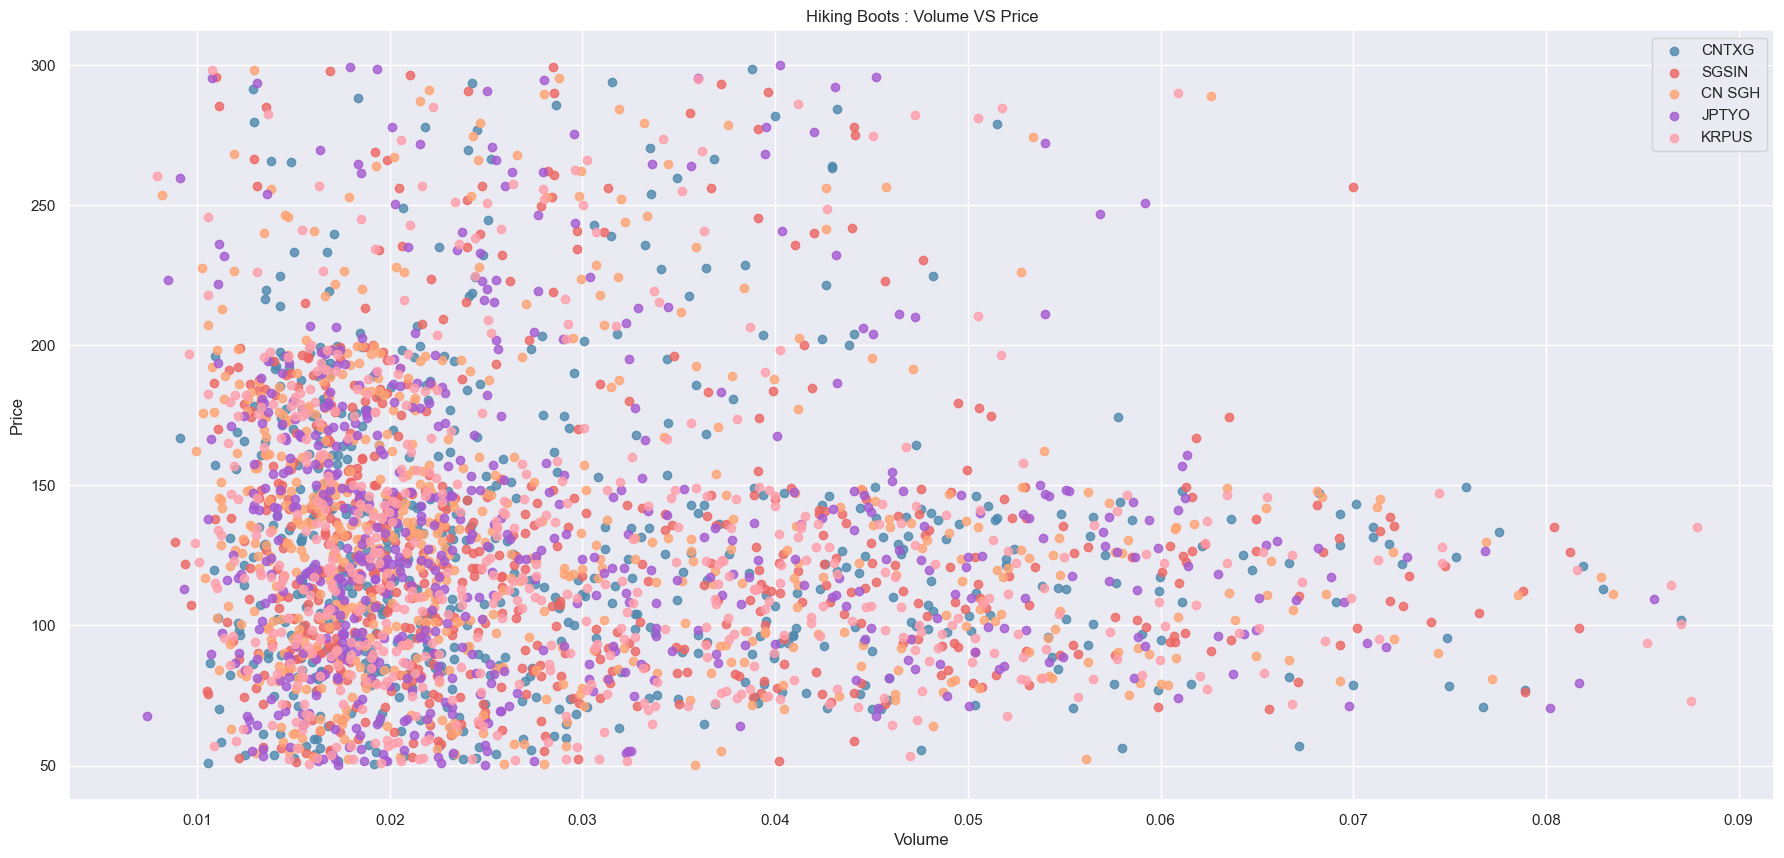

In [32]:
scatter_chart()

Select value from above list to see scatter plot: 59


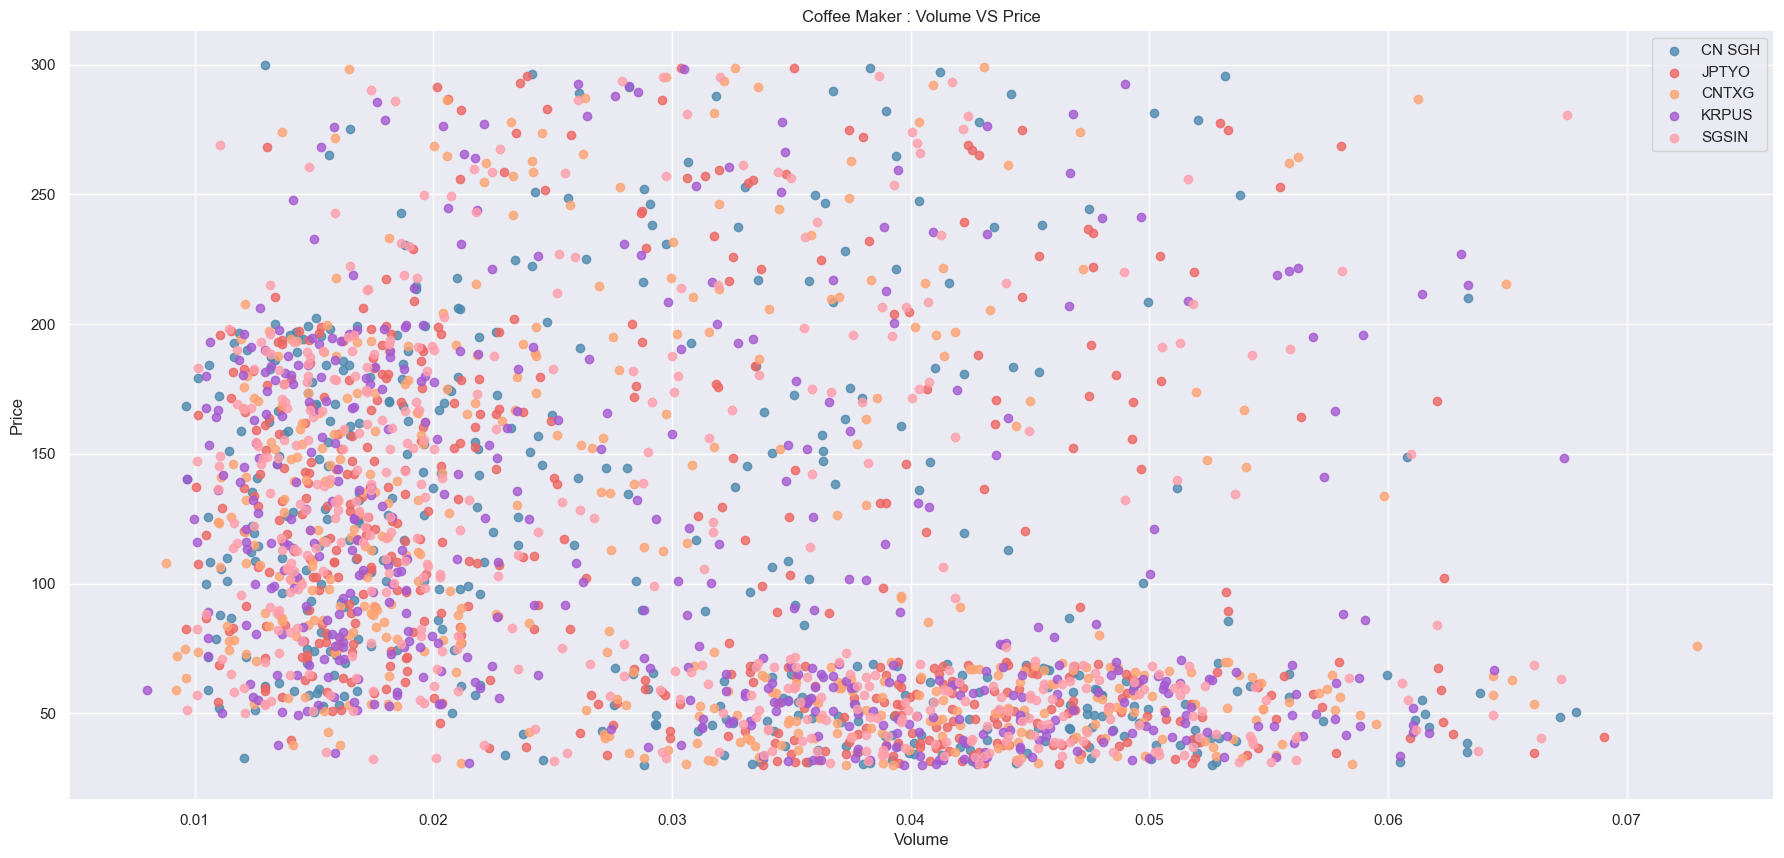

In [33]:
scatter_chart()

Select value from above list to see scatter plot: 115


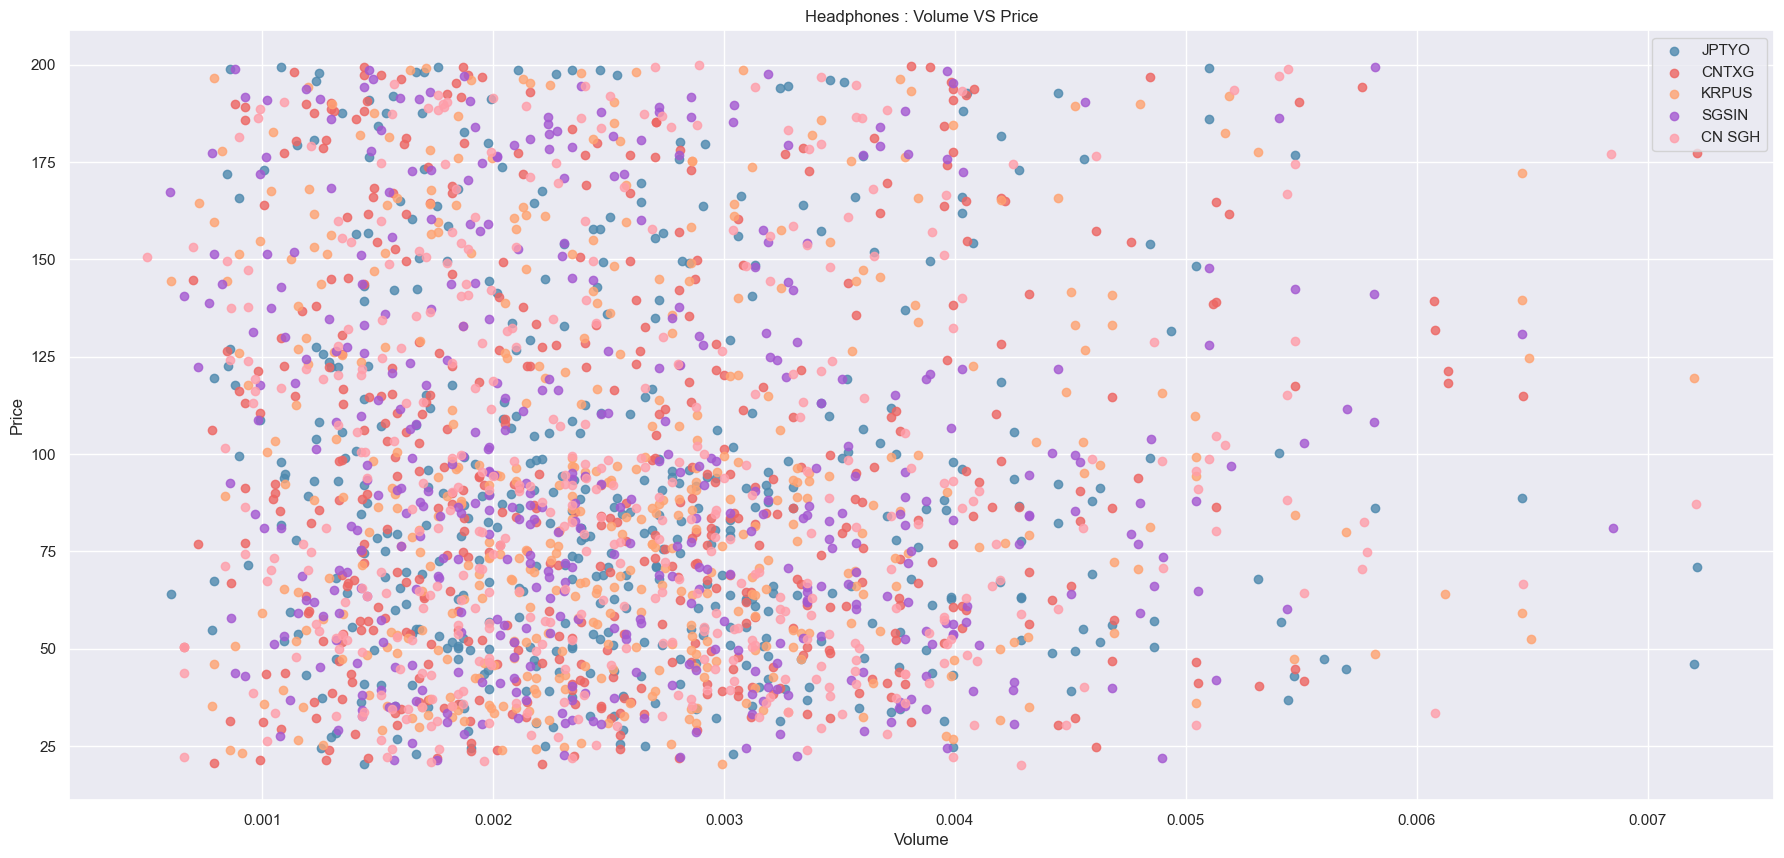

In [34]:
scatter_chart()

Select value from above list to see scatter plot: 154


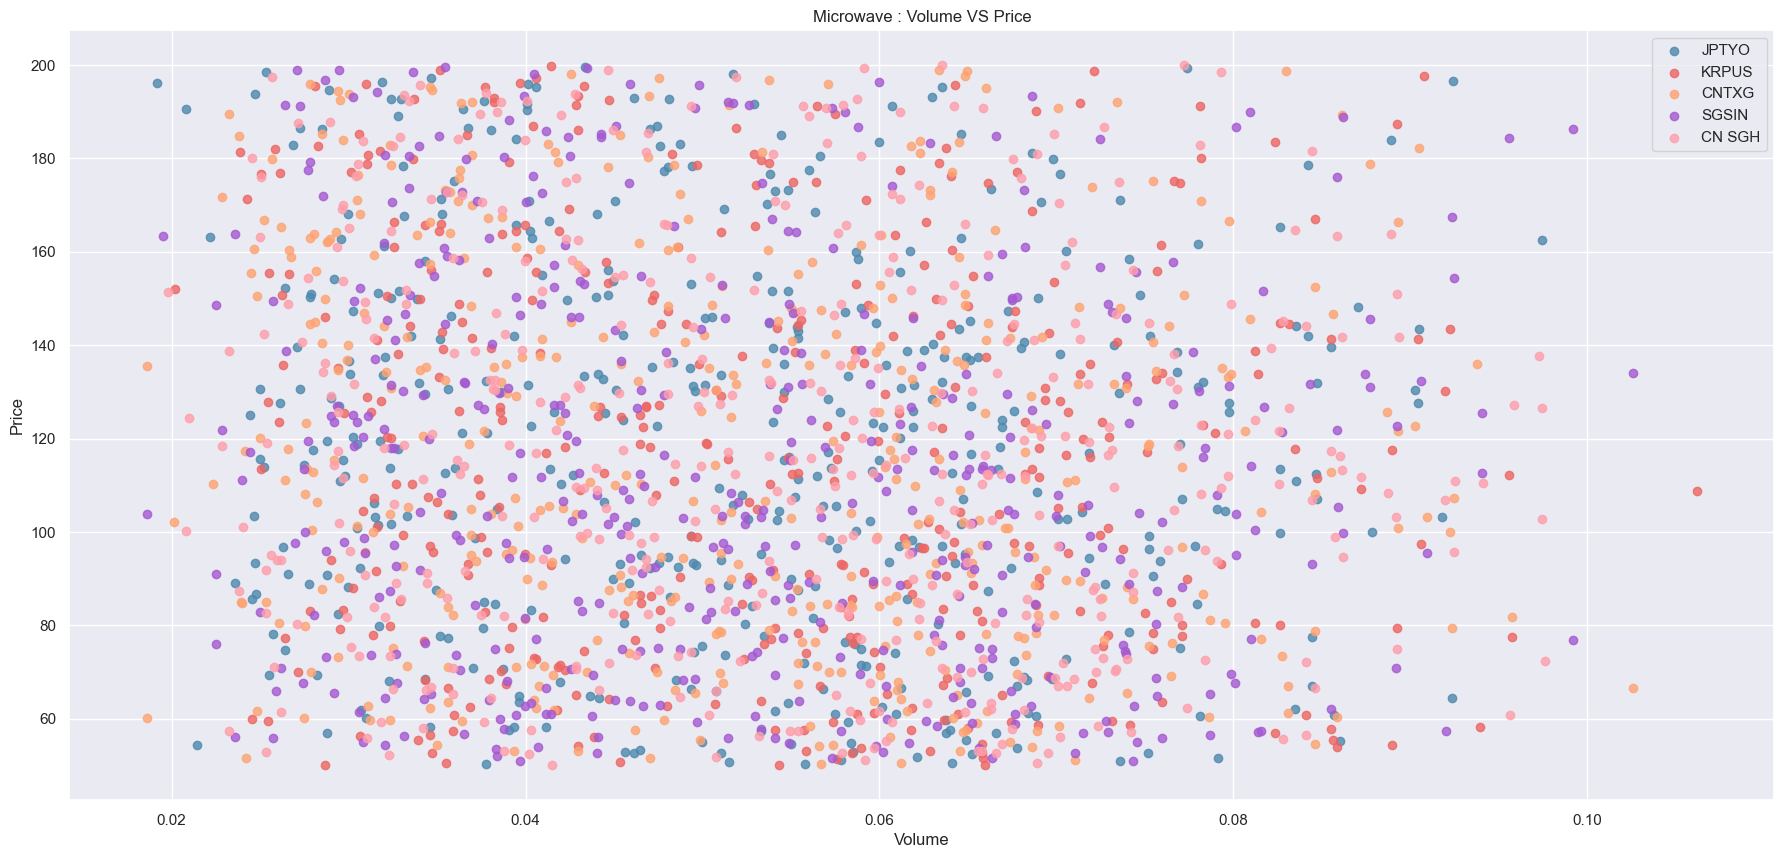

In [35]:
scatter_chart()

<div id="sec5" class="heading_div">
    <h2>Styling Sheet</h2>
    <a href="#title_div">^</a>
</div>

In [36]:
%%html
<style>
    #title_div {
        background-color: #176B87;
        padding: 20px 30%;
        border-radius: 20px 20px 0 0;
    }
    #title_div h1 {
        font-family:"Copperplate","Lucida Console";
        color: #EEEEEE;
        font-weight: 400;
    }
    #title_div h1 span {
        font-weight: 800;
    }
    .content_div {
        background-color: #F5FCCD;
        height: 90px;
        width:100%;
        padding: 0 20px;
        border-radius: 0 0 20px 20px;
    }
    .content_div .list_div {
        width:33.33%;
        float: left;
    }
    .content_div .list_div a {
        color:#419197;
        text-decoration: none;
        float: left;
    }
    .heading_div {
        border: 2px groove;
        border-radius: 10px;
        background-color: #12486B;
        padding: 5px 20px;
    }
    .heading_div h2 {
        font-family:"Lucida Console";
        color:#78D6C6;
        display: inline-grid
    }    
    .heading_div a {
        text-decoration: none;
        float: right;
        border: 1px solid;
        border-radius: 4px;
        padding: 5px;
        margin: 15px 0 0;
        background-color: #262625;
        color:#78D6C6;
    }
    h3 {
        font-family:"Georgia";
        color:#041562;
        text-decoration-line: underline;
        text-decoration-color: grey;
        text-decoration-style: dotted;
    }
</style>